In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
import math

#origin  y = 10 + x*x
def get_y(x):
    # x1 - cos(0.2*pi*x2) = 0.5
    #return x1
    pi = 3.141592654
    #return 0.5 + math.cos(0.2*pi*x)
    return x
    


def sample_data(n=10000, scale=100):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i])
        #data.append([x[i], yi])
        data.append([x[i],yi])

    return np.array(data)

In [3]:
t = sample_data(10000,10)
t.shape

(10000, 2)

In [4]:
t_noise = t + 0.3 * np.random.normal(loc=0, scale=1, size=t.shape)
t_noise.shape

(10000, 2)

In [5]:
# compress dim to 1
encoding_dim = 1
 
# this is our input placeholder
input_img = Input(shape=(2,))
 
# encode
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoder_output = Dense(encoding_dim, activation='relu')(encoded)
 
# decode
decoded = Dense(64, activation='relu')(encoder_output)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(2, activation='sigmoid')(decoded)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# compress dim to 1
encoding_dim = 1
 
# this is our input placeholder
input_img = Input(shape=(2,))
 
# encode
encoder_output = Dense(encoding_dim, activation='relu')(input_img)
 
# decode
decoded = Dense(2, activation='sigmoid')(encoder_output)

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 4         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [8]:
# construct model
autoencoder = Model(inputs=input_img, outputs=decoded)
 
# construct encoder 
encoder = Model(inputs=input_img, outputs=encoder_output)

# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
 
# training
autoencoder.fit(t_noise,t, epochs=100, batch_size=256, shuffle=True)


Epoch 1/100
10000/10000 [==============================] - 2s 194us/sample - loss: 8.8587
Epoch 2/100
10000/10000 [==============================] - 0s 25us/sample - loss: 8.8095
Epoch 3/100
10000/10000 [==============================] - 0s 15us/sample - loss: 8.7620
Epoch 4/100
10000/10000 [==============================] - 0s 14us/sample - loss: 8.7176
Epoch 5/100
10000/10000 [==============================] - 0s 15us/sample - loss: 8.6765
Epoch 6/100
10000/10000 [==============================] - 0s 13us/sample - loss: 8.6387
Epoch 7/100
10000/10000 [==============================] - 0s 13us/sample - loss: 8.6043
Epoch 8/100
10000/10000 [==============================] - 0s 12us/sample - loss: 8.5719
Epoch 9/100
10000/10000 [==============================] - 0s 12us/sample - loss: 8.5416
Epoch 10/100
10000/10000 [==============================] - 0s 15us/sample - loss: 8.5128
Epoch 11/100
10000/10000 [==============================] - 0s 14us/sample - loss: 8.4853
Epoch 12/100
10000

10000/10000 [==============================] - 0s 13us/sample - loss: 6.4017
Epoch 93/100
10000/10000 [==============================] - 0s 12us/sample - loss: 6.3993
Epoch 94/100
10000/10000 [==============================] - 0s 11us/sample - loss: 6.3969
Epoch 95/100
10000/10000 [==============================] - 0s 25us/sample - loss: 6.3946
Epoch 96/100
10000/10000 [==============================] - 0s 21us/sample - loss: 6.3923
Epoch 97/100
10000/10000 [==============================] - 0s 12us/sample - loss: 6.3901
Epoch 98/100
10000/10000 [==============================] - 0s 17us/sample - loss: 6.3879
Epoch 99/100
10000/10000 [==============================] - 0s 14us/sample - loss: 6.3858
Epoch 100/100
10000/10000 [==============================] - 0s 22us/sample - loss: 6.3837


In [10]:

# decoder
decoder = Model(inputs=encoder_output, outputs=decoded)


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: dense_6/Relu:0


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_2:0", shape=(?, 2), dtype=float32) at layer "input_2". The following previous layers were accessed without issue: []

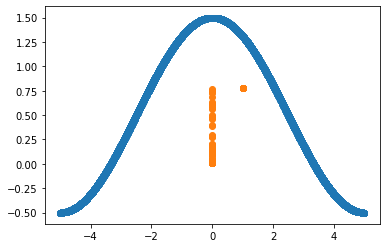

In [124]:
# plotting
autoencoder_out = autoencoder.predict(t)
plt.scatter(t[:,0],t[:,1])
plt.scatter(autoencoder_out[:, 0], autoencoder_out[:, 1])
plt.show()